In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # standard score aka z score
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelBinarizer

plt.style.use('ggplot')

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
df = pd.read_csv('2019_hdb_dataset_with_mrt_schools_sm.csv')
df = df.drop(columns = ['Unnamed: 0','Latitude','Longtitude','Year','address','nearest_mrt','nearest_primary_school','nearest_secondary_school','nearest_JC/MI','nearest_mixed_level','nearest_sm'])
df.sample(5)

,Unnamed: 0,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Year,...,nearest_primary_school,nearest_primary_school(km),nearest_secondary_school,nearest_secondary_school(km),nearest_JC/MI,nearest_JC/MI(km),nearest_mixed_level,nearest_mixed_level(km),nearest_sm,nearest_sm_distance(km)
10363,10363,YISHUN,5 ROOM,13 TO 15,112.0,Improved,2015,95 years 05 months,497000.0,2019,...,HUAMIN PRIMARY SCHOOL,0.607313,NORTHLAND SECONDARY SCHOOL,0.595251,YISHUN INNOVA JUNIOR COLLEGE,1.856139,SINGAPORE SPORTS SCHOOL,6.149830,TAN KWEE ENG,0.345716
21555,21555,SENGKANG,4 ROOM,19 TO 21,94.0,Model A,2012,91 years 02 months,465000.0,2019,...,SENGKANG GREEN PRIMARY SCHOOL,0.083195,PEI HWA SECONDARY SCHOOL,0.417662,ANDERSON SERANGOON JUNIOR COLLEGE,3.601479,CHIJ ST. NICHOLAS GIRLS' SCHOOL,4.987968,NTUC Fairprice Co-operative Ltd,0.119576
19614,19614,SENGKANG,4 ROOM,10 TO 12,92.0,Premium Apartment,2015,95 years 01 month,485000.0,2019,...,SPRINGDALE PRIMARY SCHOOL,0.429674,NAN CHIAU HIGH SCHOOL,1.111661,ANDERSON SERANGOON JUNIOR COLLEGE,5.240153,MARIS STELLA HIGH SCHOOL,6.434133,U STARS SUPERMARKET PTE. LTD.,0.208729
17277,17277,KALLANG/WHAMPOA,3 ROOM,04 TO 06,68.0,New Generation,1979,58 years 08 months,353500.0,2019,...,FARRER PARK PRIMARY SCHOOL,0.071665,NORTHLIGHT SCHOOL,0.952962,CATHOLIC JUNIOR COLLEGE,2.129843,"SCHOOL OF THE ARTS, SINGAPORE",1.546422,NTUC Fairprice Co-operative Ltd,0.294150
20531,20531,BISHAN,5 ROOM,04 TO 06,121.0,Improved,1987,66 years 07 months,700000.0,2019,...,GUANGYANG PRIMARY SCHOOL,0.133113,GUANGYANG SECONDARY SCHOOL,0.266684,NANYANG JUNIOR COLLEGE,1.872746,RAFFLES INSTITUTION,0.676736,TAN SUAN GUAY,0.114331


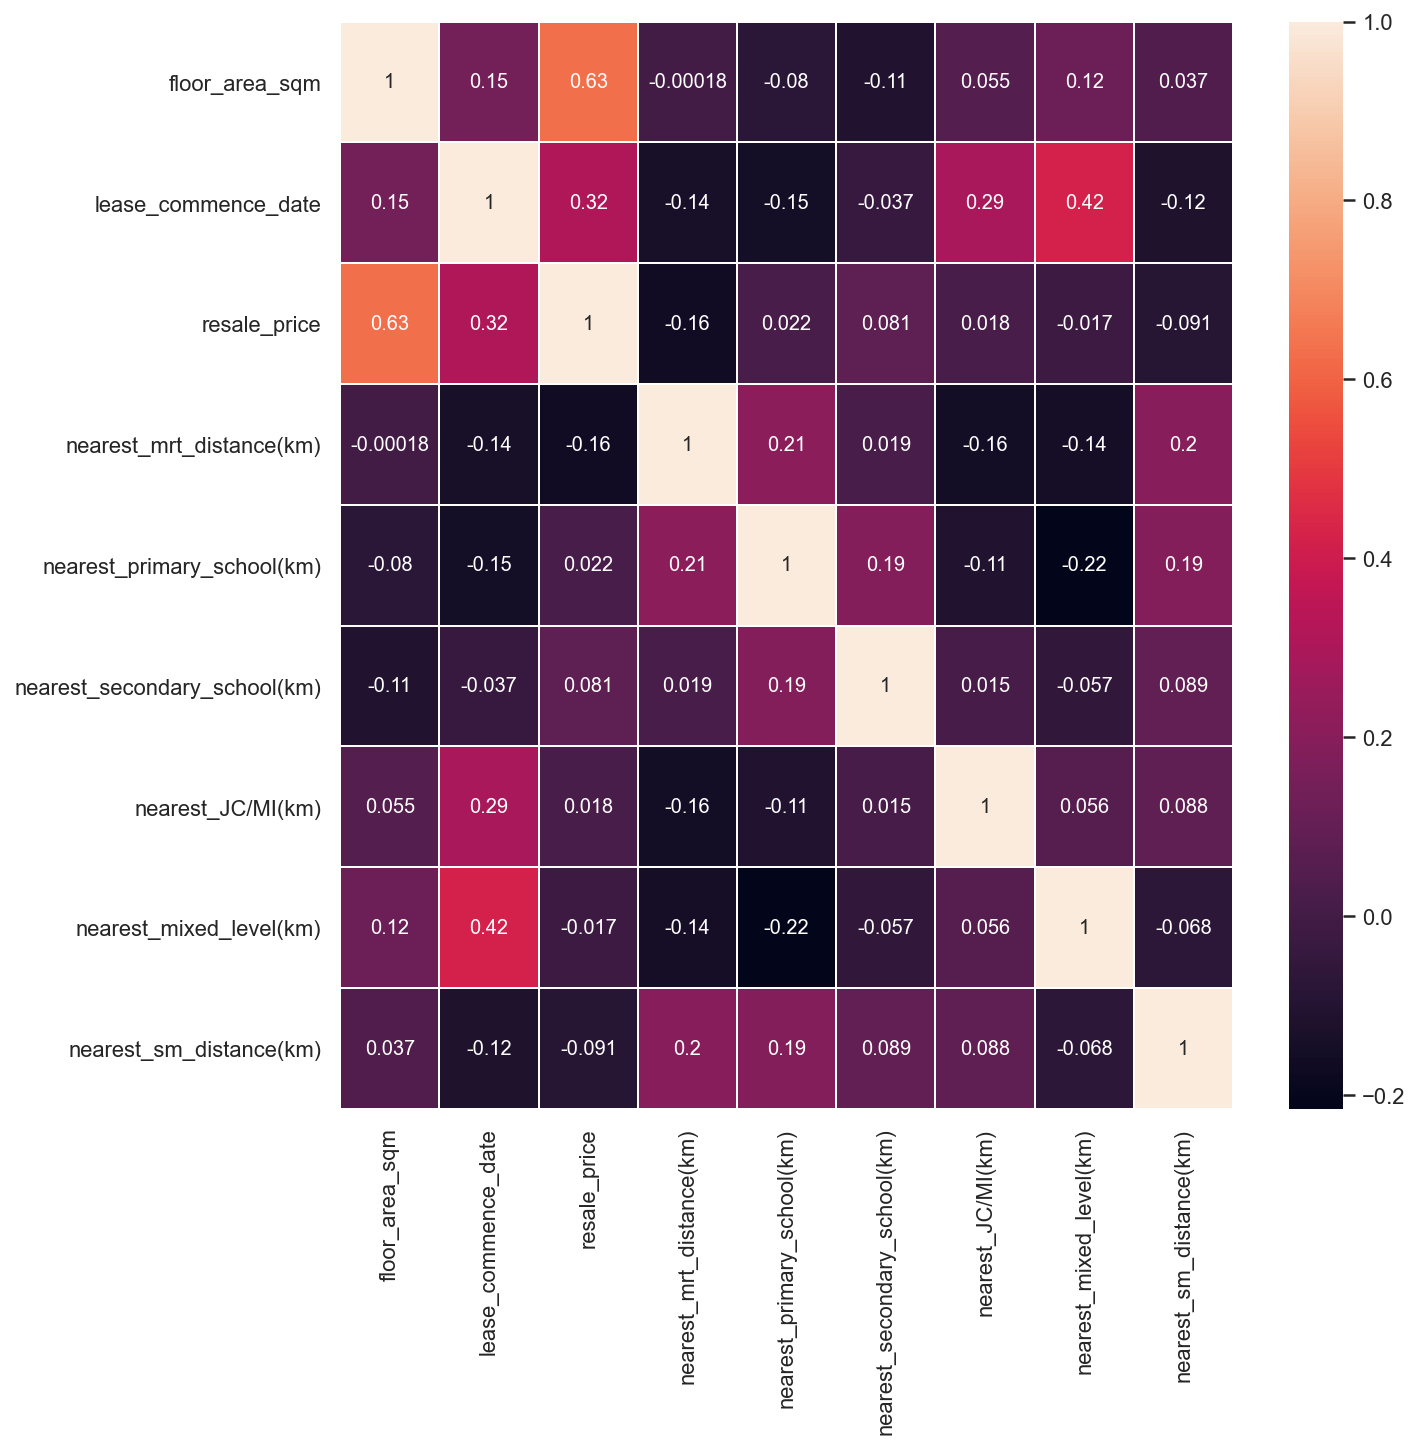

In [12]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [63]:
# df.info()

In [64]:
df['town'].unique()
df['town_region'] = df['town'].map({'ANG MO KIO':'North_East',
                             'BEDOK': 'East',
                             'BISHAN':'Central',
                             'BUKIT BATOK':'West',
                             'BUKIT MERAH':'Central',                 
                             'BUKIT PANJANG':'West',
                             'BUKIT TIMAH':'Central',
                             'CENTRAL AREA':'Central',
                             'CHOA CHU KANG':'West',
                             'CLEMENTI':'West',
                             'GEYLANG':'Central',
                             'HOUGANG':'North_East',
                             'JURONG EAST':'West',
                             'JURONG WEST':'West',
                             'KALLANG/WHAMPOA':'Central',
                             'MARINE PARADE':'Central',
                             'PASIR RIS': 'East',
                             'PUNGGOL':'North_East',
                             'QUEENSTOWN':'Central',
                             'SEMBAWANG': 'North',
                             'SENGKANG':'North_East',
                             'SERANGOON':'North_East',
                             'TAMPINES': 'East',
                             'TOA PAYOH':'Central',
                             'WOODLANDS': 'North',
                             'YISHUN': 'North'})
# df['town_region_encoded'] = df['town_region'].map({'West':1,'North':2, 'North_East':3,'East':4,'Central':5})
df = df.drop(columns = ['town'])

In [65]:
# df['storey_range'].unique()
# df['storey_range_encoded'] = df['storey_range'].map({
#                                         '10 TO 12':1,
#                                         '01 TO 03':2,
#                                         '04 TO 06':3,
#                                         '07 TO 09':4,
#                                         '13 TO 15':5,
#                                         '19 TO 21':6,
#                                         '22 TO 24':7,
#                                         '16 TO 18':8,
#                                         '34 TO 36':9,
#                                         '28 TO 30':10,
#                                         '37 TO 39':11,
#                                         '49 TO 51':12,
#                                         '25 TO 27':13,
#                                         '40 TO 42':14,
#                                         '31 TO 33':15,
#                                         '46 TO 48':16,
#                                         '43 TO 45':17})

### how school priority are assigned based on hdb
1. Singapore Citizens (SC) living within 1km of the school.
2. SCs living between 1km and 2km of the school.
3. SCs living outside 2km of the school.

### How mrt determines price of hdb based on distance
Properties within 0.5km of an MRT asked for a 15% premium over those in the general surrounding or neighbouring location.

- Golden range for school is <=2km
- Golden range for mrt <= 0.5km
- Golden range for supermakerts <=0.5km 

### Super market was assume to be nearby if <=1km. 

In [66]:
df['Is_Mrt_Nearby?'] = ['Yes' if i <= 0.5 else 'No' for i in df['nearest_mrt_distance(km)']]
df['Is_PrimarySchool_Nearby?'] = ['Yes' if i <= 2 else 'No' for i in df['nearest_primary_school(km)']]
df['Is_SecondarySchool_Nearby?'] = ['Yes' if i <=2 else 'No' for i in df['nearest_secondary_school(km)']]
df['Is_MixedLevel_Nearby?'] = ['Yes' if i <= 2 else 'No' for i in df['nearest_JC/MI(km)']]
df['Is_JC/MI_Nearby?'] = ['Yes' if i <= 2 else 'No' for i in df['nearest_mixed_level(km)']]
df['Is_sm_Nearby?'] = ['Yes' if i <= 1 else 'No' for i in df['nearest_sm_distance(km)']]
df = df.drop(columns = ['nearest_mrt_distance(km)',
                        'nearest_primary_school(km)',
                        'nearest_secondary_school(km)',
                        'nearest_JC/MI(km)',
                        'nearest_mixed_level(km)',
                        'nearest_sm_distance(km)'])

In [67]:
df

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Postal,full_address,town_region,Is_Mrt_Nearby?,Is_PrimarySchool_Nearby?,Is_SecondarySchool_Nearby?,Is_MixedLevel_Nearby?,Is_JC/MI_Nearby?,Is_sm_Nearby?
0,3 ROOM,01 TO 03,68.0,New Generation,1981,61 years 01 month,270000.0,560330,330 ANG MO KIO AVENUE 1 TECK GHEE VIEW SINGAPO...,North_East,No,Yes,Yes,Yes,Yes,Yes
1,3 ROOM,04 TO 06,73.0,New Generation,1976,56 years 04 months,295000.0,560215,215 ANG MO KIO AVENUE 1 ANG MO KIO 22 SINGAPOR...,North_East,No,Yes,Yes,Yes,Yes,Yes
2,3 ROOM,07 TO 09,67.0,New Generation,1978,58 years 01 month,270000.0,560225,225 ANG MO KIO AVENUE 1 HDB-ANG MO KIO SINGAPO...,North_East,No,Yes,Yes,Yes,Yes,Yes
3,3 ROOM,01 TO 03,67.0,New Generation,1978,58 years,230000.0,560225,225 ANG MO KIO AVENUE 1 HDB-ANG MO KIO SINGAPO...,North_East,No,Yes,Yes,Yes,Yes,Yes
4,3 ROOM,01 TO 03,68.0,New Generation,1981,61 years,262500.0,560333,333 ANG MO KIO AVENUE 1 TECK GHEE VIEW SINGAPO...,North_East,No,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22181,EXECUTIVE,04 TO 06,142.0,Apartment,1988,67 years 07 months,580000.0,760326,326 YISHUN RING ROAD YISHUN RIVERGREEN SINGAPO...,North,No,Yes,Yes,Yes,No,Yes
22182,EXECUTIVE,07 TO 09,146.0,Maisonette,1988,67 years 07 months,565000.0,760326,326 YISHUN RING ROAD YISHUN RIVERGREEN SINGAPO...,North,No,Yes,Yes,Yes,No,Yes
22183,EXECUTIVE,01 TO 03,164.0,Apartment,1992,71 years 06 months,633000.0,760608,608 YISHUN STREET 61 NEE SOON CENTRAL MEADOWS ...,North,Yes,Yes,Yes,Yes,No,Yes
22184,EXECUTIVE,10 TO 12,164.0,Apartment,1992,71 years 06 months,788888.0,760604,604 YISHUN STREET 61 NEE SOON CENTRAL MEADOWS ...,North,No,Yes,Yes,Yes,No,Yes


# 2. Baseline Model (Decision Tree)
A simple/initial model that you compare your later/more complex models against. It is basically the benchmark for your problem statement.

#### Label Encoder for ordinal data columns

In [68]:
#technically town, flat_type, streets_name and flat_model have a "tier" of sort, some town are better areas to live,
#some flat_type are better,
for column in df.columns:
    if (df[column].dtype == type(object)) and (column != 'flat_type'):
        #Create the label encoder
        le = preprocessing.LabelEncoder()
        #Convert the non numeric data to numeric
        df[column] = le.fit_transform(df[column])

In [69]:
# Randomly sample 5 records with .sample(5)
df.sample(5)

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Postal,full_address,town_region,Is_Mrt_Nearby?,Is_PrimarySchool_Nearby?,Is_SecondarySchool_Nearby?,Is_MixedLevel_Nearby?,Is_JC/MI_Nearby?,Is_sm_Nearby?
11368,5 ROOM,1,123.0,3,1989,272,380000.0,4597,7236,4,0,1,1,0,1,1
2517,3 ROOM,1,64.0,14,1985,234,345000.0,3402,1718,3,0,1,1,1,1,1
17318,3 ROOM,2,65.0,3,1975,98,358000.0,1298,6717,0,0,1,1,1,0,1
14752,2 ROOM,0,47.0,6,2013,567,208000.0,5363,5702,4,1,1,1,1,0,1
14253,4 ROOM,0,92.0,6,2015,589,370000.0,6939,4094,2,0,1,1,1,0,1


In [70]:
df = df.drop(columns = ['Postal','full_address'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22186 entries, 0 to 22185
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   flat_type                   22186 non-null  object 
 1   storey_range                22186 non-null  int32  
 2   floor_area_sqm              22186 non-null  float64
 3   flat_model                  22186 non-null  int32  
 4   lease_commence_date         22186 non-null  int64  
 5   remaining_lease             22186 non-null  int32  
 6   resale_price                22186 non-null  float64
 7   town_region                 22186 non-null  int32  
 8   Is_Mrt_Nearby?              22186 non-null  int32  
 9   Is_PrimarySchool_Nearby?    22186 non-null  int32  
 10  Is_SecondarySchool_Nearby?  22186 non-null  int32  
 11  Is_MixedLevel_Nearby?       22186 non-null  int32  
 12  Is_JC/MI_Nearby?            22186 non-null  int32  
 13  Is_sm_Nearby?               221

#### One Hot Encoder for nominal data columns

In [7]:
# #OneHotEncoder categorical nominal data column "town","flat_type","street_name","flat_model","Day of Week"
# cols = ["town","street_name","flat_model"]
# for i in cols:
#     labelbinarizer = LabelBinarizer()
#     x = labelbinarizer.fit_transform(df[i])
#     encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
#     df = pd.concat([df, encoded_df], axis=1)

### Building Decision Tree Model

In [71]:
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM', '2 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [74]:
#split dataset in features and target variable
feature_cols = df.drop(columns = ['flat_type'])
X = feature_cols
#y = df[['flat_type']]
y = df['flat_type']

In [75]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [76]:
# initialise Decision Tree
#Using gini currently, can also use entropy or miclassification error.
clf = DecisionTreeClassifier(criterion='gini',random_state=0) 

# train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [77]:
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(100)

,Actual,Predicted
3631,4 ROOM,4 ROOM
11664,4 ROOM,4 ROOM
8002,3 ROOM,3 ROOM
9409,3 ROOM,3 ROOM
7777,EXECUTIVE,EXECUTIVE
...,...,...
18465,4 ROOM,4 ROOM
3406,4 ROOM,4 ROOM
18757,3 ROOM,3 ROOM
8010,3 ROOM,3 ROOM


In [78]:
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9975214060387562


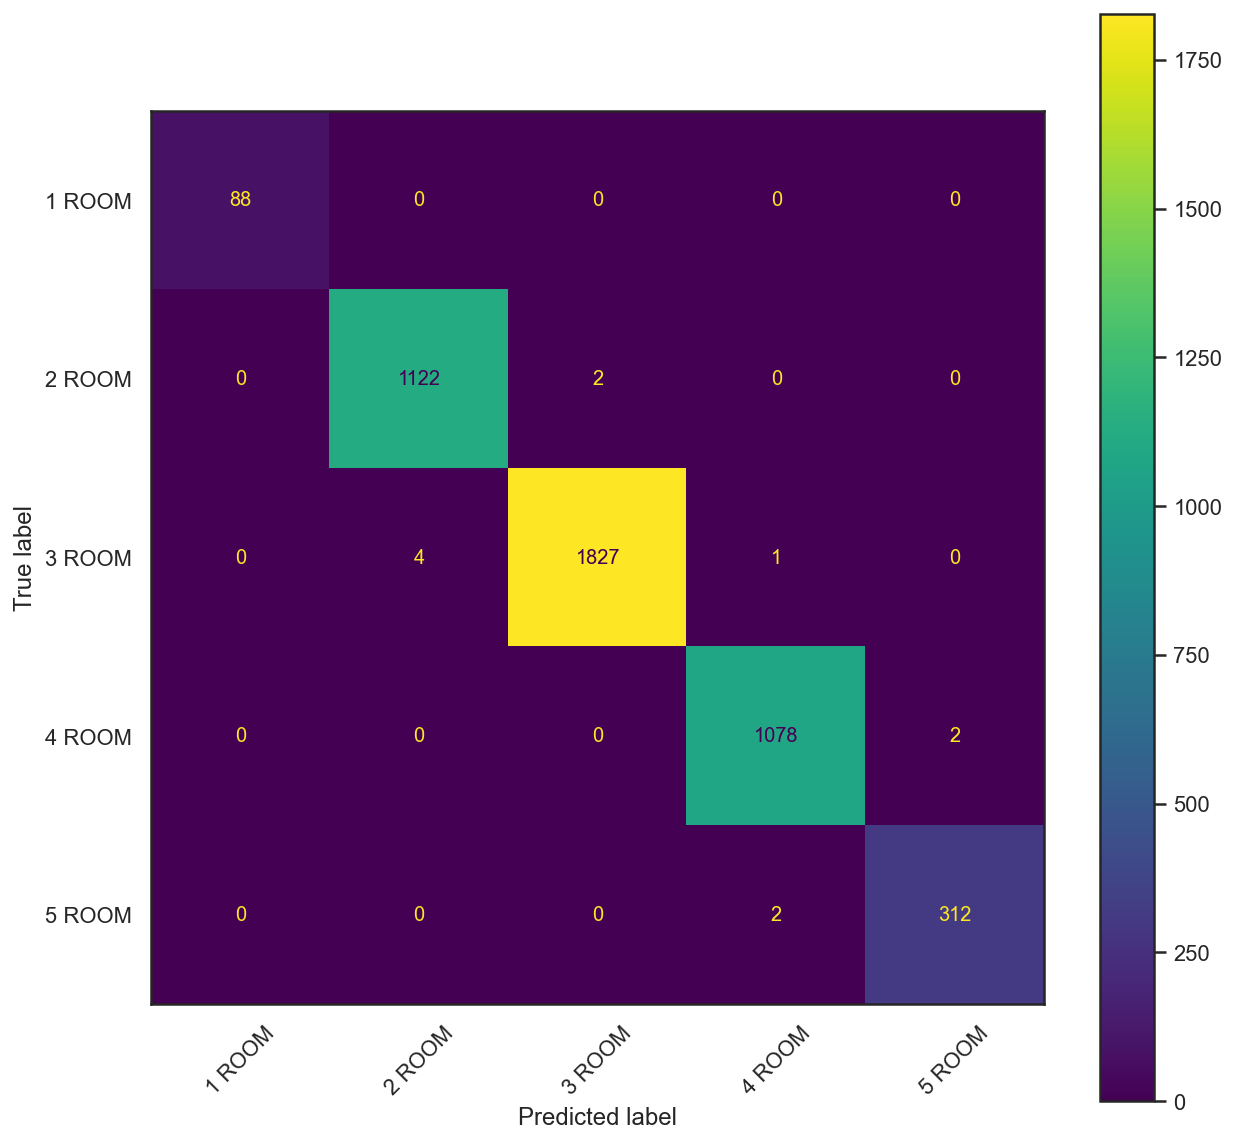

In [79]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation = 45);

In [80]:
# Precision = (True Positive)/(Total Predicted Positive)
# To determine if costs of False Positive is high.
precision = metrics.precision_score(y_test, predictions, average='micro')
precision1 = metrics.precision_score(y_test, predictions, average='macro')
precision2 = metrics.precision_score(y_test, predictions, average='weighted')

#Recall = (True Positive)/(Total Actual Positive)
# calculates the no. of Actual Positives our model capture through labeling it as Positive
recall = metrics.recall_score(y_test, predictions, average='micro')
recall1 = metrics.recall_score(y_test, predictions, average='macro')
recall2 = metrics.recall_score(y_test, predictions, average='weighted')

#F1-score = 2* (precision*recall)/(precision + recall)
# F1 Score is needed when you want to seek a balance between Precision and Recall.
f_measure = metrics.f1_score(y_test, predictions, average='micro')
f_measure1 = metrics.f1_score(y_test, predictions, average='macro')
f_measure2 = metrics.f1_score(y_test, predictions, average='weighted')

# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
print("Precision_micro:",precision)
print("Recall_micro:",recall)
print("F-measure_micro:",f_measure)

print("Precision1_macro:",precision1)
print("Recall1_macro:",recall1)
print("F-measure1_macro:",f_measure1)

print("Precision2_weighted:",precision2)
print("Recall2_weighted:",recall2)
print("F-measure2_weighted:",f_measure2)

Precision_micro: 0.9975214060387562
Recall_micro: 0.9975214060387562
F-measure_micro: 0.9975214060387562
Precision1_macro: 0.997241894705365
Recall1_macro: 0.9974540208648058
F-measure1_macro: 0.997347623411087
Precision2_weighted: 0.9975228930875937
Recall2_weighted: 0.9975214060387562
F-measure2_weighted: 0.9975216213316023


In [81]:
###################################################################################################################################


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)


In [83]:
#Create the kNN classifier and set the number of neighbors to be 3. Note that you can tune this number of neighbors
model = KNeighborsClassifier(n_neighbors=3)

#Fit the training feature Xs and training label Ys
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred = model.predict(X_test)

In [85]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out different scores.
f2 = precision_score(y_pred, y_test,average='micro')
f3 = recall_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   5    1    2    0    0    0    0]
 [   0  120   36    0    0    0    0]
 [   3   67 2297  259   22    8    0]
 [   0    6  299 3816  590  113    2]
 [   0    0   31  512 1927  269    3]
 [   0    0    5   47  155  491    2]
 [   0    0    0    0    1    3    1]]
accuracy:  0.7804020553502209
f1-Score:  0.7804020553502209
precision:  0.7804020553502209
recall:  0.7804020553502209


## Bagging (with Decision Tree)

Refer to the following links on for detail explanation on the implementation:

In [86]:
#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=50)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

BaggingClassifier(n_estimators=50)

In [87]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)

In [88]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')
f1_macro = f1_score(y_pred, y_test,average='macro')
f1_weighted = f1_score(y_pred, y_test,average='weighted')


# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,average='micro')
f2_macro = precision_score(y_pred, y_test,average='macro')
f2_weighted = precision_score(y_pred, y_test,average='weighted')

f3 = recall_score(y_pred, y_test,average='micro')
f3_macro = recall_score(y_pred, y_test,average='macro')
f3_weighted = recall_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('Accuracy: ',asr)
print('F1-Score_micro: ',f1)
print('precision_micro: ',f2)
print('recall_micro: ',f3)
print('F1-Score_maro: ',f1_macro)
print('precision_macro: ',f2_macro)
print('recall_macro: ',f3_macro)
print('F1-Score_weighted: ',f1_weighted)
print('precision_weighted: ',f2_weighted)
print('recall_weighted: ',f3_weighted)

[[   8    0    0    0    0    0    0]
 [   0  193    0    0    0    0    0]
 [   0    1 2654    9    1    0    0]
 [   0    0   15 4624    0    0    0]
 [   0    0    0    1 2691    2    0]
 [   0    0    0    0    3  882    0]
 [   0    0    1    0    0    0    8]]
Accuracy:  0.9970251509961237
F1-Score_micro:  0.9970251509961237
precision_micro:  0.9970251509961237
recall_micro:  0.9970251509961237
F1-Score_maro:  0.9895300251064734
precision_macro:  0.9975640307262622
recall_macro:  0.9824320624872686
F1-Score_weighted:  0.9970230802097363
precision_weighted:  0.9970272738806629
recall_weighted:  0.9970251509961237


In [89]:
# get predictions and compare results
predictions = model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
13336,5 ROOM,5 ROOM
6116,4 ROOM,4 ROOM
22039,3 ROOM,3 ROOM
17667,4 ROOM,4 ROOM
11879,5 ROOM,5 ROOM
20169,EXECUTIVE,EXECUTIVE
14004,3 ROOM,3 ROOM
21959,5 ROOM,5 ROOM
21997,EXECUTIVE,EXECUTIVE
12908,EXECUTIVE,EXECUTIVE


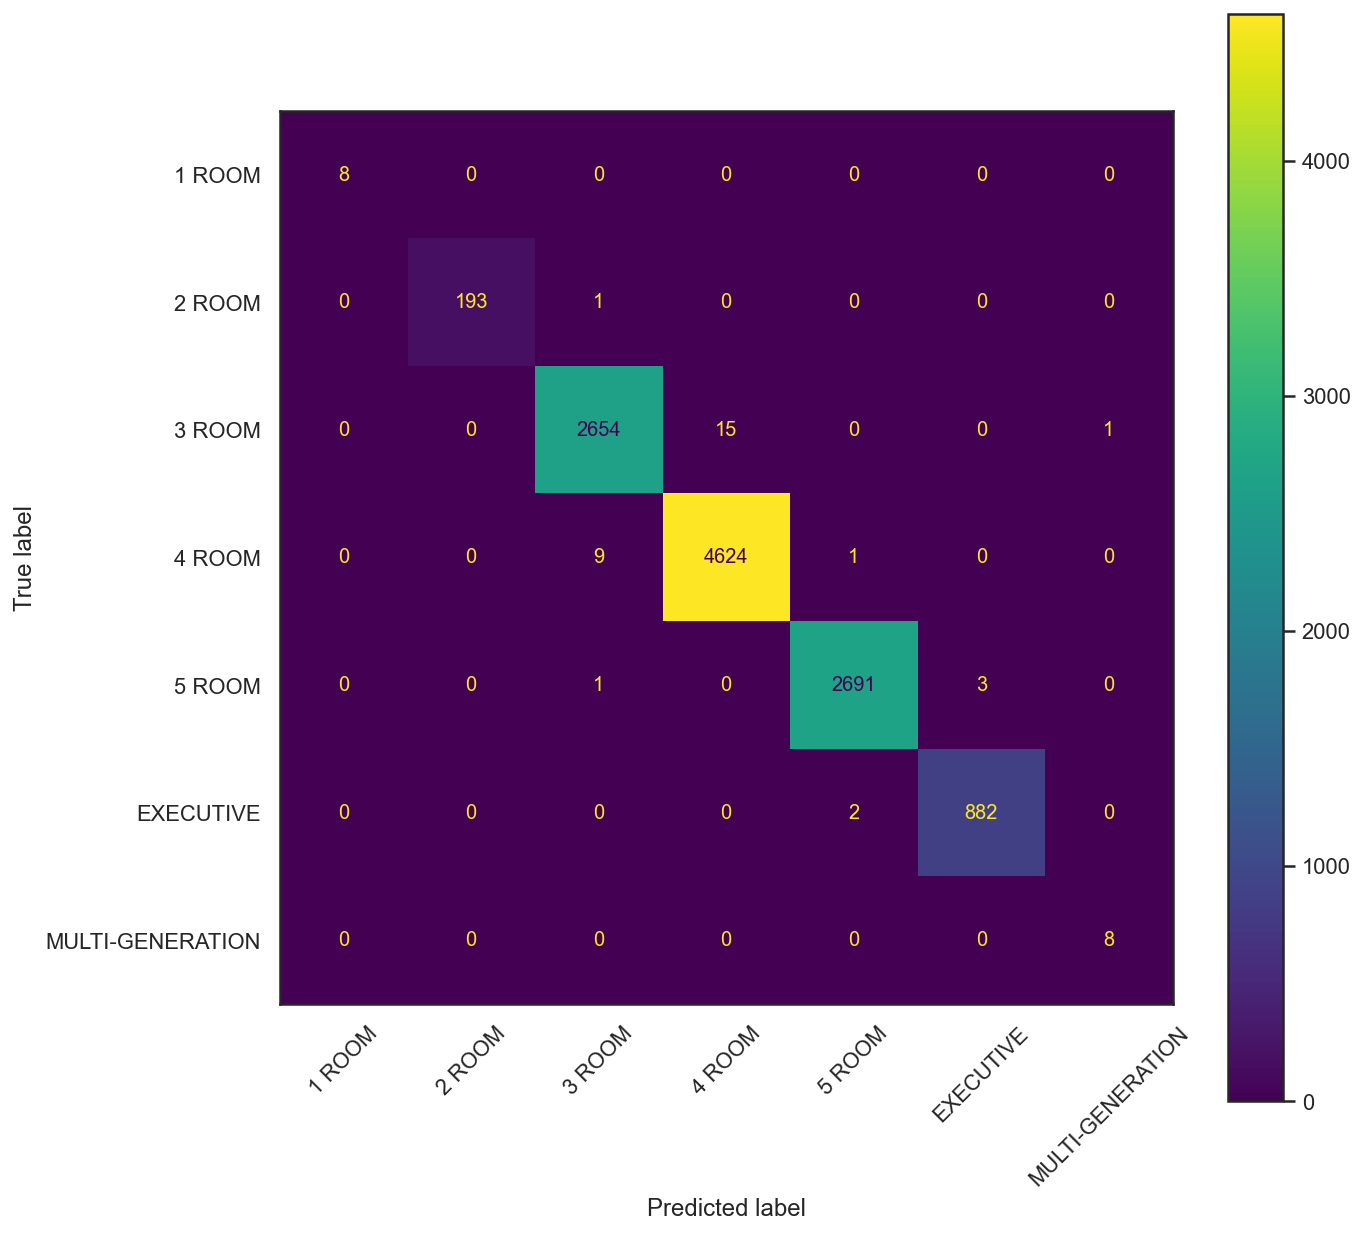

In [90]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(model, X_test, y_test, ax=ax, xticks_rotation = 45);

## Bagging (with kNN)

In [91]:
#Create the kNN base classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=50, base_estimator=knn)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)

In [92]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,pos_label='positive',average='micro')
f3 = recall_score(y_pred, y_test,pos_label='positive',average='micro')
#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   8    0    0    0    0    0    0]
 [   0  193    0    0    0    0    0]
 [   0    1 2654    9    1    0    0]
 [   0    0   15 4624    0    0    0]
 [   0    0    0    1 2691    2    0]
 [   0    0    0    0    3  882    0]
 [   0    0    1    0    0    0    8]]
accuracy:  0.9970251509961237
f1-Score:  0.9970251509961237
precision:  0.9970251509961237
recall:  0.9970251509961237


## AdaBoost (with Decision Tree)


In [93]:
#Create the AdaBoost classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
# - learning_rate controls the weight adjustments of each base classifiers. Default is 1
modelA = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)

#Fit the training feature Xs and training label Ys
modelA.fit(X_train, y_train)

#Use the trained modelA to predict the test data
y_pred = modelA.predict(X_test)

In [94]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')
f1_macro = f1_score(y_pred, y_test,average='macro')
f1_weighted = f1_score(y_pred, y_test,average='weighted')


# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,average='micro')
f2_macro = precision_score(y_pred, y_test,average='macro')
f2_weighted = precision_score(y_pred, y_test,average='weighted')

f3 = recall_score(y_pred, y_test,average='micro')
f3_macro = recall_score(y_pred, y_test,average='macro')
f3_weighted = recall_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('Accuracy: ',asr)
print('F1-Score_micro: ',f1)
print('precision_micro: ',f2)
print('recall_micro: ',f3)
print('F1-Score_maro: ',f1_macro)
print('precision_macro: ',f2_macro)
print('recall_macro: ',f3_macro)
print('F1-Score_weighted: ',f1_weighted)
print('precision_weighted: ',f2_weighted)
print('recall_weighted: ',f3_weighted)

[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   8  193  391    6    0    0    0]
 [   0    1 2277 4545   23    0    0]
 [   0    0    2   83 2672  839    3]
 [   0    0    0    0    0   45    5]
 [   0    0    0    0    0    0    0]]
Accuracy:  0.6898945280807717
F1-Score_micro:  0.6898945280807717
precision_micro:  0.6898945280807717
recall_micro:  0.6898945280807717
F1-Score_maro:  0.28236061067297386
precision_macro:  0.3099438189231471
recall_macro:  0.42288084708493623
F1-Score_weighted:  0.7774662990815204
precision_weighted:  0.9350869126474227
recall_weighted:  0.6898945280807717


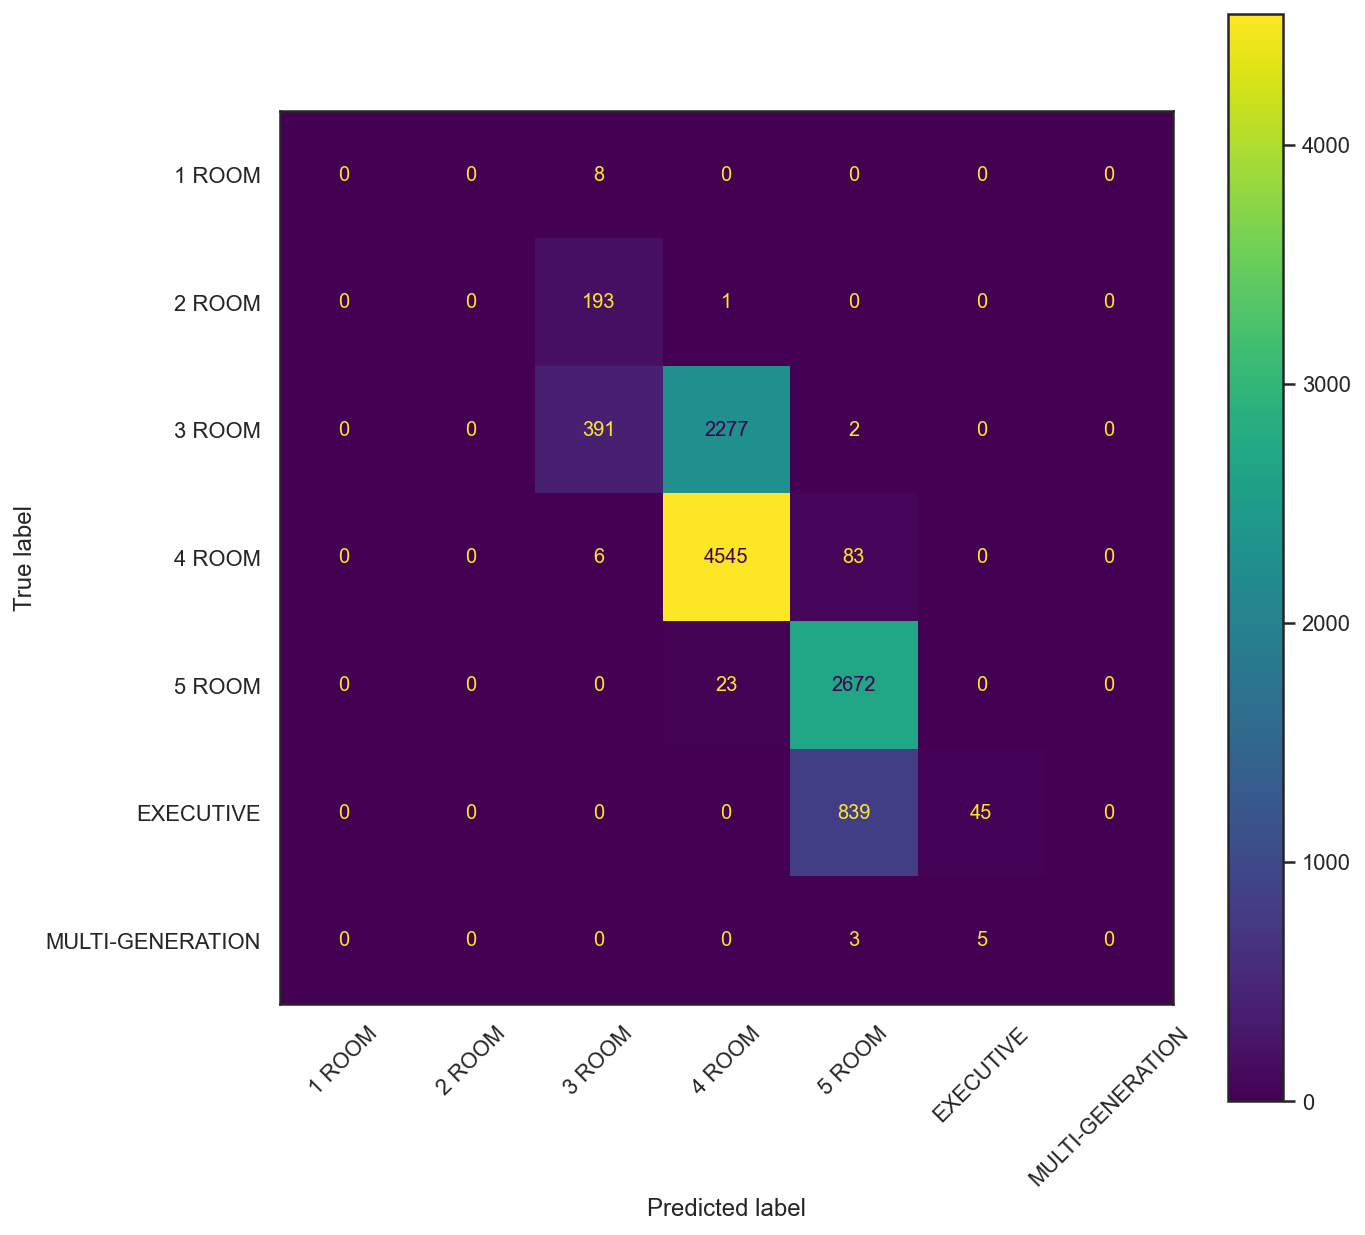

In [95]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(modelA, X_test, y_test, ax=ax, xticks_rotation = 45);

## AdaBoost (with Gaussian Navie Bayes)
Refer to the following links on for detail explanation on the implementation:

In [96]:
model = GaussianNB()
#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

GaussianNB()

In [97]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   8    0    0    0    0    0    0]
 [   0  182    0    0    0    0    0]
 [   0   12 2578  136    0    0    0]
 [   0    0   90 4328   96    0    0]
 [   0    0    1  170 2484  154    0]
 [   0    0    1    0  115  730    3]
 [   0    0    0    0    0    0    5]]
accuracy:  0.929865681060128
f1-Score:  0.929865681060128
precision:  0.9120203174643736
recall:  0.9298409013950721


In [98]:
nb = GaussianNB()

model = AdaBoostClassifier(n_estimators=50,learning_rate=1, base_estimator=nb)
#model = BaggingClassifier(n_estimators=50, base_estimator=knn)


#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=1)

In [99]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('asr: ',asr)
print('f1: ',f1)
print('f2: ',f2)
print('f3: ',f3)

[[   5    0    0    0    0    0    0]
 [   2   36   20    0    0    0    0]
 [   1  158 2634  997   21    0    0]
 [   0    0   14 2950  695    1    0]
 [   0    0    1  687 1975  474    0]
 [   0    0    1    0    4  409    7]
 [   0    0    0    0    0    0    1]]
asr:  0.7220769854863427
f1:  0.7220769854863427
f2:  0.5864971430799938
f3:  0.7311373325537028


# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(max_depth = 2, n_estimators=100, random_state=424, criterion ='entropy')
clf = RandomForestClassifier(n_estimators=100, random_state=0, criterion ='entropy')

clf.fit(X_train,y_train)

# get predictions 
predictions = clf.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).sample(10)

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[   8,    0,    0,    0,    0,    0,    0],
       [   0,  192,    2,    0,    0,    0,    0],
       [   0,    0, 2654,   16,    0,    0,    0],
       [   0,    0,    8, 4621,    5,    0,    0],
       [   0,    0,    0,    1, 2692,    2,    0],
       [   0,    0,    0,    0,    1,  883,    0],
       [   0,    0,    0,    0,    0,    0,    8]], dtype=int64)

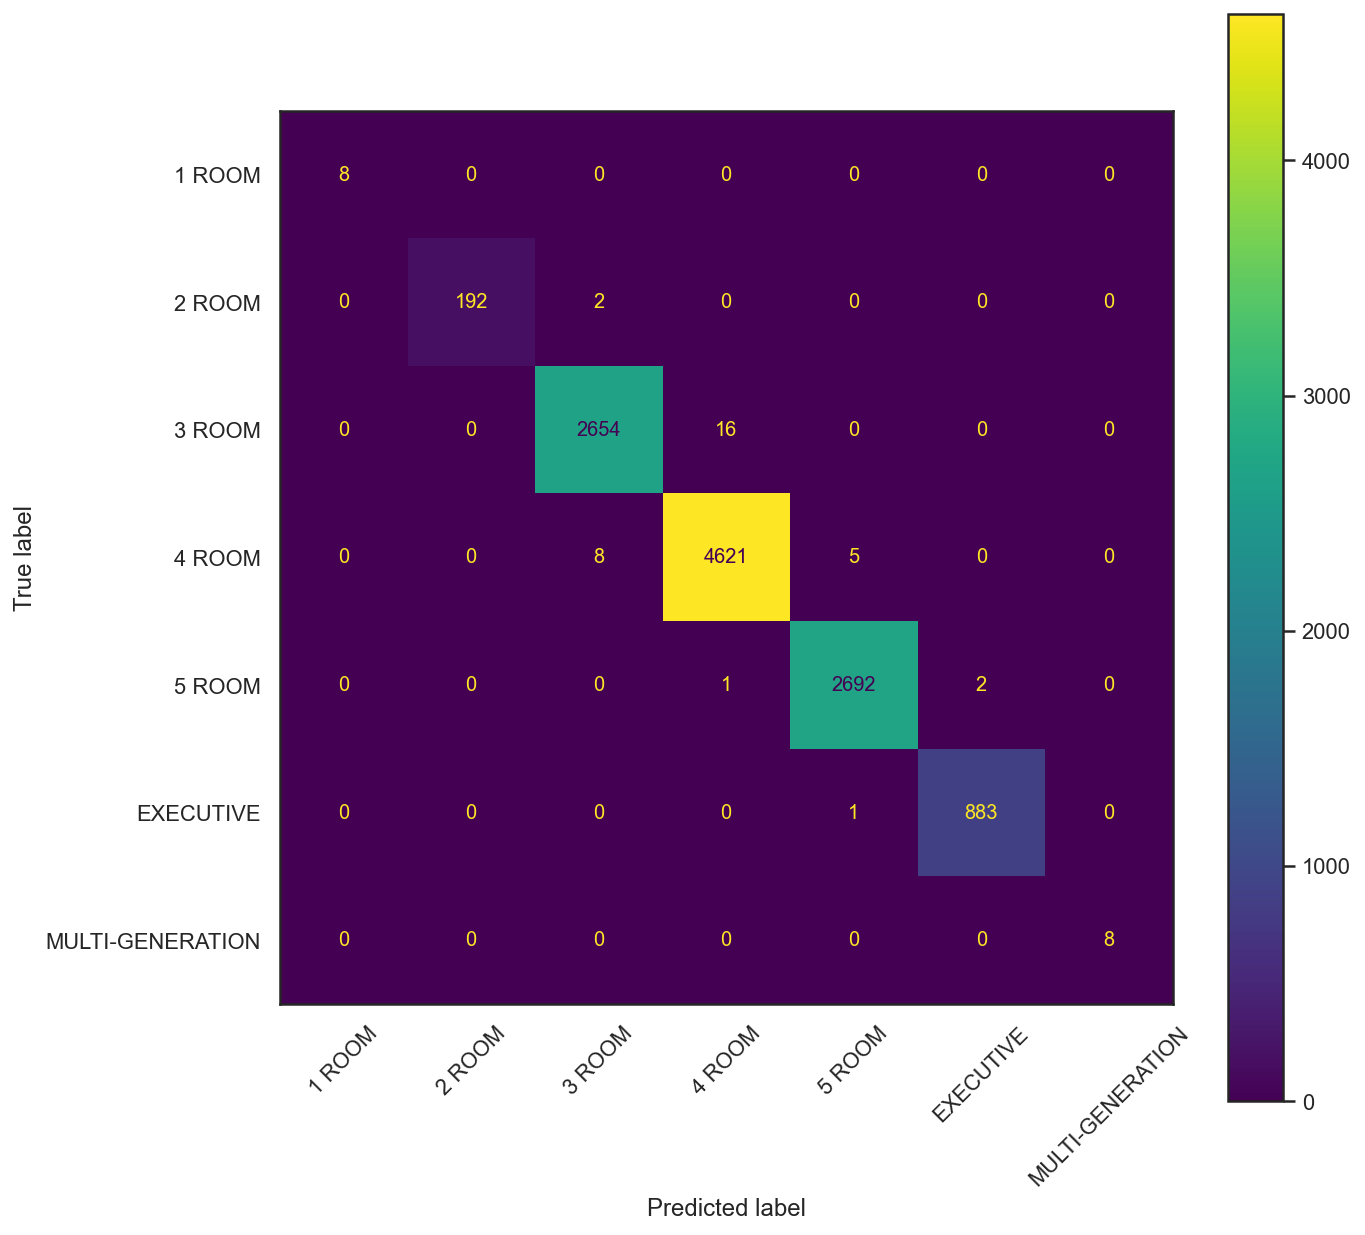

In [101]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation = 45);

In [102]:
# Find the accuracy and F1 score of the result
asr = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

accuracy:  0.7220769854863427
f1-Score:  0.7220769854863427
precision:  0.5864971430799938
recall:  0.7311373325537028
